<a href="https://colab.research.google.com/github/Rafterbang/TugasPraktikumML_258-271/blob/main/Transfer_Learning_%E2%80%93_VGG16_for_Monkey_Species_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bonniex","key":"f168cc1a9c5a88036c36e61abd26d010"}'}

In [2]:
! pip install kaggle

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
# jika anda ingin menggunakan kaggle API untuk mengunduh dataset gunakan
# kode berikut untuk membantu anda membuat config kaggle.json
# pastikan anda mendaftar akun kaggle terlebih dahulu
# kemudian menuju halaman my account dan buat token API anda

api_token = {"username":"bonniex","key":"f168cc1a9c5a88036c36e61abd26d010"}
import json
import zipfile
import os
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

In [7]:
! kaggle datasets download slothkong/10-monkey-species

 99% 540M/547M [00:04<00:00, 164MB/s]
100% 547M/547M [00:04<00:00, 120MB/s]


In [8]:
! unzip 10-monkey-species

Archive:  10-monkey-species.zip
  inflating: monkey_labels.txt       
  inflating: training/training/n0/n0018.jpg  
  inflating: training/training/n0/n0019.jpg  
  inflating: training/training/n0/n0020.jpg  
  inflating: training/training/n0/n0021.jpg  
  inflating: training/training/n0/n0022.jpg  
  inflating: training/training/n0/n0023.jpg  
  inflating: training/training/n0/n0024.jpg  
  inflating: training/training/n0/n0025.jpg  
  inflating: training/training/n0/n0026.jpg  
  inflating: training/training/n0/n0027.jpg  
  inflating: training/training/n0/n0028.jpg  
  inflating: training/training/n0/n0029.jpg  
  inflating: training/training/n0/n0030.jpg  
  inflating: training/training/n0/n0031.jpg  
  inflating: training/training/n0/n0032.jpg  
  inflating: training/training/n0/n0033.jpg  
  inflating: training/training/n0/n0034.jpg  
  inflating: training/training/n0/n0035.jpg  
  inflating: training/training/n0/n0036.jpg  
  inflating: training/training/n0/n0037.jpg  
  inflatin

***Import Library***

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random

# Libraries for TensorFlow
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models, layers

# Library for Transfer Learning
from tensorflow.keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input

***Data Gathering***

In [10]:
# Main Dataset
main_folder="/content/training/training"
class_names=os.listdir(main_folder)
print(class_names)
print("\n")

# Function to know the name of Monkey Species
def Get_Species_Type(argument):
    switcher = {
        "n0": "Mantled Howler",
        "n1": "Patas Monkey",
        "n2": "Bald Uakari",
        "n3": "Japanese Macaque",
        "n4": "Pygmy Marmoset",
        "n5": "White Headed Capuchin",
        "n6": "Silvery Marmoset",
        "n7": "Ommon Squirrel Monkey",
        "n8": "Black Headed Night Monkey",
        "n9": "Nilgiri Langur"
    }
    return switcher.get(argument, "Invalid Spicies")

# Get_Species_Type("n2")

# # Test Dataset
# validation_folder="../input/10-monkey-species/validation/validation"
# val_class_names=os.listdir(validation_folder)
# print(val_class_names)

# Validation Dataset
validation_folder="/content/validation/validation"
val_class_names=os.listdir(validation_folder)
print(val_class_names)

['n3', 'n9', 'n1', 'n6', 'n7', 'n4', 'n0', 'n5', 'n8', 'n2']


['n3', 'n9', 'n1', 'n6', 'n7', 'n4', 'n0', 'n5', 'n8', 'n2']


***Preparing Data***

In [11]:
#Deklarasi Variabel
x=[] # untuk menyimpan array value imagenya
y=[] # untuk menyimpan label imagenya

for folder in os.listdir(main_folder):
    image_list=os.listdir(main_folder+"/"+folder)
    for img_name in image_list:
        # Loading images
        img=image.load_img(main_folder+"/"+folder+"/"+img_name,target_size=(224,224))
        
        # convert ke array
        img=image.img_to_array(img)
        
        img=preprocess_input(img) #  Optional step
        
        # Appending arrarys
        x.append(img) # appending image array
        y.append(class_names.index(folder)) # appending class index to the array


In [12]:
# menyiapkan image validation untuk processing

val_images=[]
val_images_Original=[]
val_image_label=[] #untuk store label imagenya

for folder in os.listdir(validation_folder):
    image_list=os.listdir(validation_folder+"/"+folder)
    for img_name in image_list:
        # Loading images
        img=image.load_img(validation_folder+"/"+folder+"/"+img_name,target_size=(224,224))
        
        # Converting to arrarys
        img=image.img_to_array(img)
        
        #menyimpan image ori, digunakan hanya untuk display
        val_images_Original.append(img.copy())
        
        img=preprocess_input(img) #  Optional step
        
        # Appending arrays
        val_images.append(img) # appending image array
        val_image_label.append(val_class_names.index(folder))

***Verification of Data***

In [13]:
# Verifying Output

print("Training Dataset")

x=np.array(x) #Convert np to array untuk model
print(x.shape)

y=to_categorical(y) # onehot encoding labels
# print(y)
print(y.shape)



print("Validation Dataset")

val_images=np.array(val_images) 
print(val_images.shape)

val_image_label=to_categorical(val_image_label) # onehot encoding labels
print(val_image_label.shape)

Training Dataset
(1098, 224, 224, 3)
(1098, 10)
Validation Dataset
(272, 224, 224, 3)
(272, 10)


***Building Model : Transfer Learning***

In [14]:
#Check summary atau properties dari modal yang akan kita gunakan untuk transfer learning

print("Summary VGG16 model.\n")

#kita menggunakan VGG16 untuk transfer learning, import library
from tensorflow.keras.applications import VGG16

# initializing model dengan wieght = "imagenet". 
model_vgg16=VGG16(weights='imagenet')

model_vgg16.summary()

Summary VGG16 model.

553476096/553467096 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________

***Hasil Observasi kami***

1. kami ingin menggunakan weight originaln model, sehingga kami mengunakan weight = "imagenet"
2. layer pertama input yang dapat diterima adalah image dengan size (224,224,3). image dataset berbeda, sehingga kami mengubah parameter -image_size di layer pertama. sehingga ukuran kami adalah (224,224,3)
3. kami menginginkan perubahan pada layer terakhir dimana kami memiliki 10 class classification bermasalah. sehingga, kami tidak menggunakan top layer
4. kami tidak akan train semua layer kecuali layer terakhir. sehingga, kami mensetting properties for trainable = false kecuali layer top atau layer terakhir.


In [15]:
# Modelling menggunakan Transfer Learning

# menyiapkan model sesuai dengan requirment kami

print("Summary of Custom VGG16 model.\n")
print("1) setup input layer dan 2) menghapus top (last) layer. \n")

# input_layer dirubah menjadi (224,224,3)
input_layer=layers.Input(shape=(224,224,3))

# initialize model VGG16 
# 1) weights='imagenet'
# 2) input_tensor untuk pass VGG16 menggunkan input_tensor
# 3) kami menginginkan perubahan pada layer terakhir sehingga kami tidak mengikutkan top layer
model_vgg16=VGG16(weights='imagenet',input_tensor=input_layer,include_top=False)

model_vgg16.summary()

Summary of Custom VGG16 model.

1) setup input layer dan 2) menghapus top (last) layer. 

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 11

***Hasil Observasi kami***

1. layer pertama kini memiliki image size = (224,224,3) sesudah kita definisikan
2. 2 top (layer terakhir) pada model VGG16 yang asli tidak gunakan di model yang kita custom karena kita set include_top=false:

_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
fc1 (Dense)                  (None, 4096)              102764544 
_________________________________________________________________
fc2 (Dense)                  (None, 4096)              16781312  
_________________________________________________________________
predictions (Dense)          (None, 1000)              4097000   



In [16]:
# access top layer atau last layer dari model dan menambahkan flatten dan dense 

print("Custom VGG16 model.\n")
print("1) We flatten the last layer and added 1 Dense layer and 1 output layer.\n")
print("1) kami flatten top layer atau last layer dan menambahkan 1 Dense layer and 1 output layer.\n")

last_layer=model_vgg16.output # mengakses top/last

# menambahkan flatten layer
flatten=layers.Flatten()(last_layer) 

# menambahkan dense layer
# dense1=layers.Dense(100,activation='relu')(flatten)

#menambahkan dense layer untuk final output layer
output_layer=layers.Dense(10,activation='softmax')(flatten)

# membuat model dengan input dan output
model=models.Model(inputs=input_layer,outputs=output_layer)

model.summary()

Custom VGG16 model.

1) We flatten the last layer and added 1 Dense layer and 1 output layer.

1) kami flatten top layer atau last layer dan menambahkan 1 Dense layer and 1 output layer.

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block

In [17]:
# kami freez semua layers kecuali last layer

# kami membuat semua layers tidak dapat terlihat kecuali  last layer
print("kami membuat semua layers tidak dapat terlihat kecuali layer terakhir. \n")
for layer in model.layers[:-1]:
    layer.trainable=False
model.summary()

kami membuat semua layers tidak dapat terlihat kecuali layer terakhir. 

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________

In [18]:
#split data untuk train dan test

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=5)
#print(xtrain)
#print(xtest)
#print(ytrain)
#print(ytest)

In [19]:
# Compile Model
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [20]:
# Fit Model
model.fit(xtrain,ytrain,epochs=20,batch_size=128,verbose=True,validation_data=(xtest,ytest))

Epoch 1/20
7/7 [==============================] - 483s 71s/step - loss: 28.1869 - accuracy: 0.3770 - val_loss: 5.4140 - val_accuracy: 0.7909
Epoch 2/20
7/7 [==============================] - 481s 71s/step - loss: 2.6177 - accuracy: 0.8770 - val_loss: 4.0668 - val_accuracy: 0.8591
Epoch 3/20
7/7 [==============================] - 481s 71s/step - loss: 0.1572 - accuracy: 0.9897 - val_loss: 1.9619 - val_accuracy: 0.9318
Epoch 4/20
7/7 [==============================] - 481s 71s/step - loss: 0.0248 - accuracy: 0.9989 - val_loss: 2.3605 - val_accuracy: 0.9318
Epoch 5/20
7/7 [==============================] - 481s 71s/step - loss: 0.0110 - accuracy: 0.9989 - val_loss: 2.6384 - val_accuracy: 0.9273
Epoch 6/20
7/7 [==============================] - 481s 71s/step - loss: 0.0053 - accuracy: 0.9989 - val_loss: 2.7378 - val_accuracy: 0.9227
Epoch 7/20
7/7 [==============================] - 481s 71s/step - loss: 4.1084e-06 - accuracy: 1.0000 - val_loss: 2.7601 - val_accuracy: 0.9227
Epoch 8/20
7/7 

***Model Evaluation***

In [25]:
# fungsi ini membantu memprediksi image 
def predict(img_name):
    img=image.load_img(img_name,target_size=(224,224))
    img=image.img_to_array(img)
    plt.imshow(img.astype('int32'))
    plt.show()
    img=preprocess_input(img)
#     plt.imshow(img.astype('int32'))
#     plt.show()
    prediction=model.predict(img.reshape(1,224,224,3))
    output=np.argmax(prediction)
    print(class_names[output] + ": " + Get_Species_Type(class_names[output]))
#     print(class_names[output])
#     print(class_names_actual[output])
    
    

#fungsi ini berfungsi untuk plot image di array
def plot_image(i, predictions_array, true_label, img): 
    
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img.astype('int32'))
    
    predicted_label=np.argmax(predictions_array)
    true_label=np.argmax(true_label)

#     print(predicted_label)
#     print(true_label)

    if predicted_label == true_label: #setting up label color
        color='green' 
    else:
        color='red' 
    
#     predicted_class=val_class_names[predicted_label]
#     true_class=val_class_names[true_label]
    
    plt.xlabel("{} {:2.0f}% \n ({})".format(Get_Species_Type(val_class_names[predicted_label]), 100*np.max(predictions_array), Get_Species_Type(val_class_names[true_label]), color=color, horizontalalignment='left'))
#     plt.xlabel("{} {:2.0f}% ({})".format(val_class_names[predicted_label], 100*np.max(predictions_array), val_class_names[true_label]), color=color)

# fungsi ini berfungsi untuk plot bar chart
def plot_value_array(i, predictions_array, true_label): 
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    predicted_label=np.argmax(predictions_array)
    true_label=np.argmax(true_label)
#     print(predicted_label)
#     print(true_label)
    if predicted_label == 0:
        predicted_label=1
    if true_label == 0:
        true_label=1
    
    thisplot=plt.bar(range(10), predicted_label, color='seashell')
    plt.ylim([0,1])

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

***Prediksi***

In [21]:
predictions=[]

for img in val_images:
    img=img.reshape(1,224,224,3)
    predictions.append(model.predict(img))

In [22]:
# Download Image dari internet
# white_headed_capuchin
!wget -q https://upload.wikimedia.org/wikipedia/commons/thumb/2/23/Young_White-headed_capuchin.JPG/220px-Young_White-headed_capuchin.JPG
    
# japanese_macaque
!wget -q https://cdn.britannica.com/41/75641-050-32026A25/Grooming-Members-group-Japanese-macaques-each-other.jpg

# patas_monkey
!wget -q https://animalia.us-east-1.linodeobjects.com/animals/photos/full/1.25x1/macaque-showing-a-bit-of-tongue.jpg

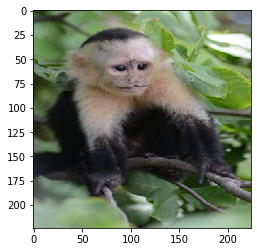

n5: White Headed Capuchin


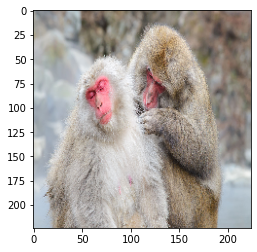

n3: Japanese Macaque


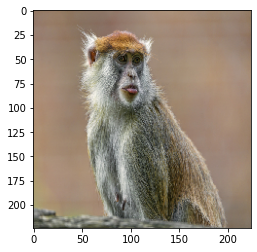

n1: Patas Monkey


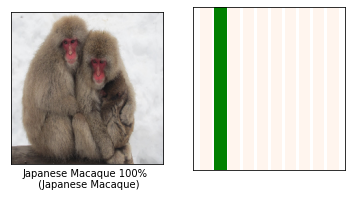

In [26]:
# Prediction of individual images taken from internet
#prediksi image yang diambil dari internet

# memanggil fungsi
predict('220px-Young_White-headed_capuchin.JPG') 
predict('Grooming-Members-group-Japanese-macaques-each-other.jpg')
predict('macaque-showing-a-bit-of-tongue.jpg')

#definisikan parameters untuk menggunakan fungsi
i=random.randrange(1, 25) 
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)

plot_image(i,predictions, val_image_label, val_images_Original) 
plt.subplot(1,2,2)
plot_value_array(i, predictions, val_image_label)
plt.show()

Transfer Learning – VGG16  for Monkey Species Image Classification

Predicted Species, Percentage, (Original Species)



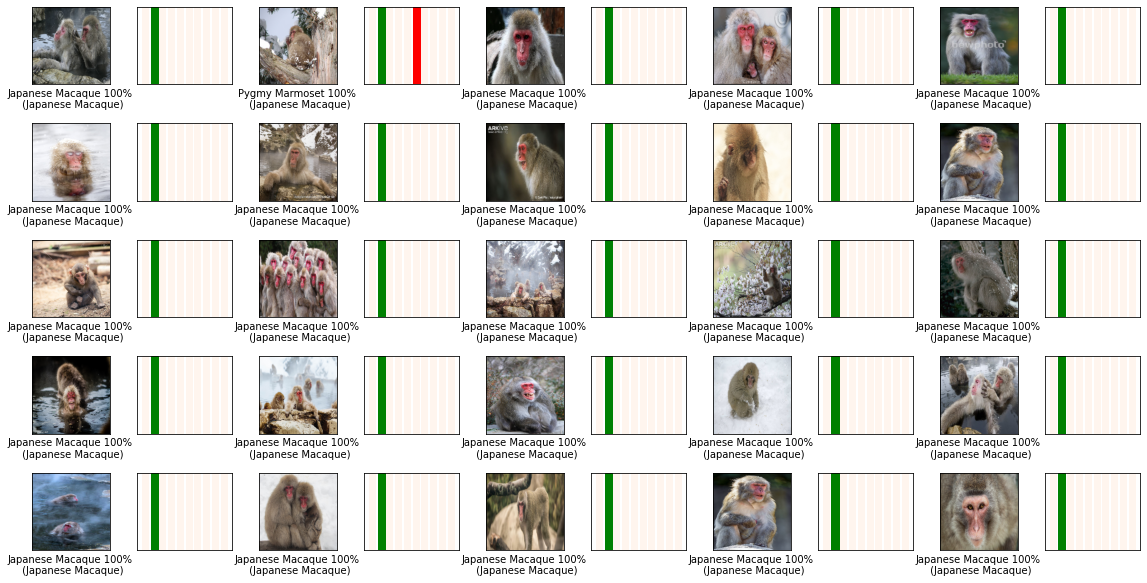

In [27]:
# prediksi dari image validation

num_rows=5
num_cols=5
num_images=num_rows*num_cols

plt.figure(figsize=(2*2*num_cols,2*num_rows))

print("Transfer Learning – VGG16  for Monkey Species Image Classification\n")
print("Predicted Species, Percentage, (Original Species)\n")

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
#     ii=random.randrange(1,227)

    plot_image(i,predictions, val_image_label, val_images_Original)
    
    plt.subplot(num_rows, 2*num_cols, 2*i+2)

    plot_value_array(i, predictions, val_image_label)
plt.subplots_adjust(hspace=0.5)
plt.show()